# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I had an appalling experie...
1,"Not Verified | Good points, the cabin crew, t..."
2,"Not Verified | It was a decent flight, reason..."
3,✅ Trip Verified | I really like flying Briti...
4,✅ Trip Verified | Could not book online the ...


In [ ]:
df.to_csv("D:\myDSproject\Data\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
#removing "trip verified from the dataframe"
df1 = pd.read_csv("D:\myDSproject\Data\BA_reviews.csv", index_col=0)

# Remove "✅ Trip Verified"
df1["reviews"] = df1["reviews"].str.replace("✅ Trip Verified", "", regex=False)

df1.to_csv("D:\myDSproject\Data\BA_reviews_cleaned.csv")


In [ ]:
from google.colab import files
files.download("D:\myDSproject\Data\BA_reviews_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.head()

,reviews
0,| I had an appalling experience with Britis...
1,"Not Verified | Good points, the cabin crew, t..."
2,"Not Verified | It was a decent flight, reason..."
3,| I really like flying British Airways part...
4,| Could not book online the night before be...


TEXT CLEANING

In [ ]:
# Drop null rows
df1.dropna(inplace=True)

# Remove duplicates if any
df1.drop_duplicates(inplace=True)

# standard text cleaning
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df1['cleaned_review'] = df1['reviews'].apply(clean_text)


In [ ]:
df1.head()

,reviews,cleaned_review
0,| I had an appalling experience with Britis...,i had an appalling experience with british air...
1,"Not Verified | Good points, the cabin crew, t...",not verified good points the cabin crew they w...
2,"Not Verified | It was a decent flight, reason...",not verified it was a decent flight reasonable...
3,| I really like flying British Airways part...,i really like flying british airways particula...
4,| Could not book online the night before be...,could not book online the night before because...


In [ ]:
df1 = df1.drop('reviews', axis=1)
df1

,cleaned_review
0,i had an appalling experience with british air...
1,not verified good points the cabin crew they w...
2,not verified it was a decent flight reasonable...
3,i really like flying british airways particula...
4,could not book online the night before because...
...,...
995,i wouldnt even rate them x business class pass...
996,flying london city to geneva the only plus was...
997,los angeles to istanbul via london flight betw...
998,phoenix to tel aviv via london the return from...


TOKENIZATION AND STOPWORDS REMOVAL

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

def tokenize_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df1['tokens'] = df1['cleaned_review'].apply(tokenize_remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df1.head()

,cleaned_review,tokens
0,i had an appalling experience with british air...,appalling experience british airways started t...
1,not verified good points the cabin crew they w...,verified good points cabin crew helpful profes...
2,not verified it was a decent flight reasonable...,verified decent flight reasonable comfortable ...
3,i really like flying british airways particula...,really like flying british airways particularl...
4,could not book online the night before because...,could book online night system arrived early a...


VISUAL INSIGHT

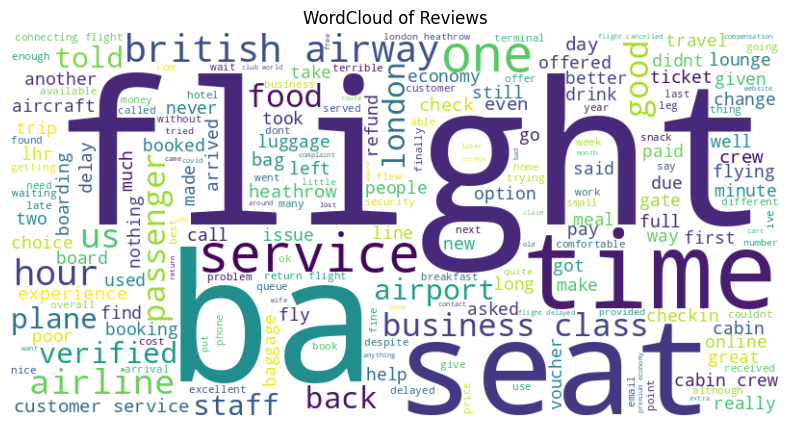

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df1['tokens'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews')
plt.show()


SENTIMENT ANALYSIS

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

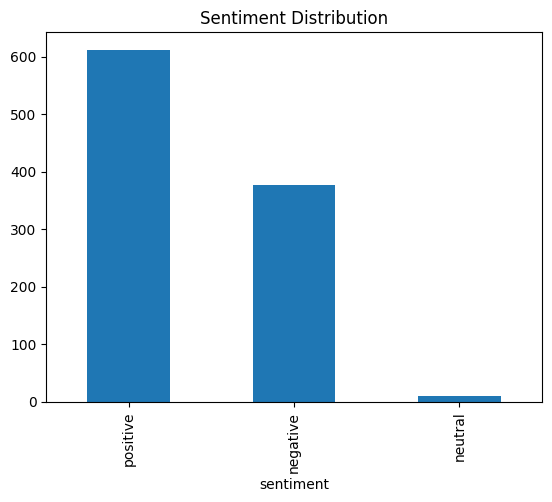

In [ ]:
from textblob import TextBlob

# Apply sentiment polarity
df1['polarity'] = df1['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1['sentiment'] = df1['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Sentiment distribution
df1['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')


Getting the percentage shares of each sentiments


In [ ]:
#  value counts of each sentiment
sentiment_counts = df1['sentiment'].value_counts()

# Calculating percentages
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Combining into a DataFrame
sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage (%)': sentiment_percentages.round(2)
})

print(sentiment_summary)


           Count  Percentage (%)
sentiment                       
positive     612            61.2
negative     377            37.7
neutral       11             1.1


In [ ]:
df1[df1['sentiment']== 'negative'].head()

,cleaned_review,tokens,polarity,sentiment
0,i had an appalling experience with british air...,appalling experience british airways started t...,-0.056573,negative
4,could not book online the night before because...,could book online night system arrived early a...,-0.151111,negative
8,the employee at venice airport checkin was ver...,employee venice airport checkin rude us made m...,-0.258125,negative
9,i had only bag with me a carry on trolley ever...,bag carry trolley everyone one boarding group ...,-0.152143,negative
12,not verified very good service on this route b...,verified good service route ba th march cabin ...,-0.118333,negative


Drawing out the common words in the negative reviews

In [ ]:
from collections import Counter
negative_reviews = df1[df1['sentiment'] == 'negative']
stop_words = set(stopwords.words('english'))
words = ' '.join(negative_reviews['tokens']).split()
filtered_words = [word for word in words if word not in stop_words]
freq = Counter(filtered_words)
print(freq.most_common(10))


[('flight', 686), ('ba', 434), ('service', 270), ('us', 207), ('british', 190), ('airways', 183), ('hours', 176), ('class', 168), ('seat', 165), ('london', 164)]


filtering out generic words

In [ ]:
# Standard stopwords
stop_words = set(stopwords.words('english'))

# setting stopwords for generic words to give insight
custom_stopwords = {
    'flight', 'ba', 'british', 'airways', 'class', 'seat', 'seats',
    'business', 'customer', 'service', 'airline', 'london', 'us', 'one'
}

# Combine both stopword lists
all_stopwords = stop_words.union(custom_stopwords)

# Create word list from 'tokens' column of negative reviews
negative_reviews = df1[df1['sentiment'] == 'negative']
words = ' '.join(negative_reviews['tokens']).split()

# Filter out stopwords and custom stopwords
filtered_words = [word for word in words if word not in all_stopwords]

# Count word frequencies
freq = Counter(filtered_words)

# Print most common words (real complaints)
print(freq.most_common(20))

[('hours', 176), ('time', 144), ('get', 137), ('told', 132), ('would', 131), ('staff', 127), ('airport', 120), ('heathrow', 120), ('even', 118), ('food', 116), ('luggage', 108), ('back', 108), ('cancelled', 108), ('crew', 107), ('never', 104), ('could', 103), ('verified', 103), ('hour', 103), ('flights', 99), ('passengers', 99)]


REPRESENTATION OF COMPLAIN TERMS

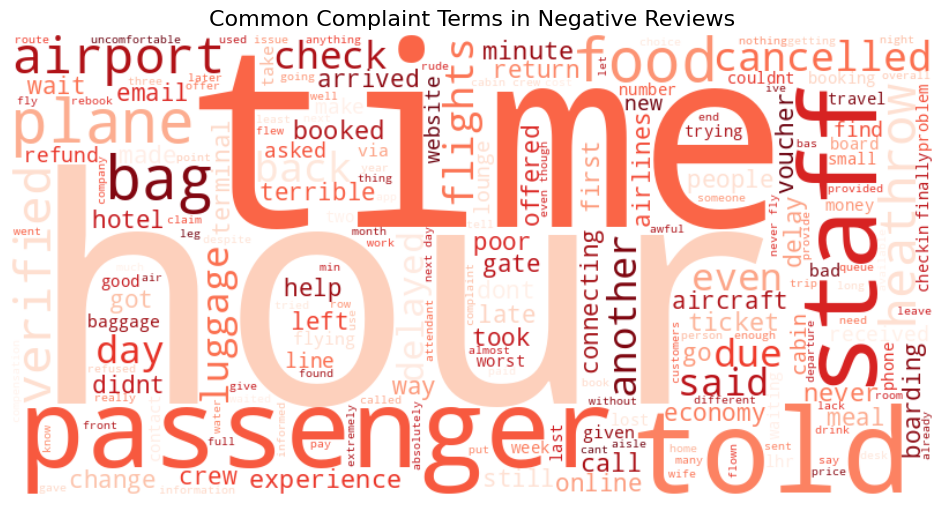

In [ ]:
import matplotlib.pyplot as plt

# Create a string from the filtered words
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Complaint Terms in Negative Reviews", fontsize=16)
plt.show()


<ipython-input-19-e82b335ac1a2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=freq_df, palette='Reds_r')


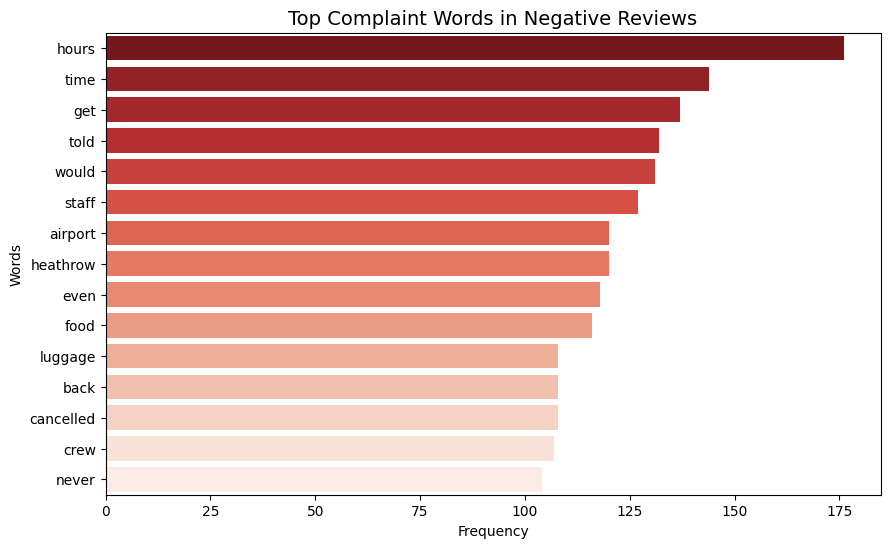

In [ ]:
import seaborn as sns

# Convert the frequency dictionary into a DataFrame
freq_df = pd.DataFrame(freq.most_common(15), columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=freq_df, palette='Reds_r')
plt.title("Top Complaint Words in Negative Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


Topic modelling on negative reviews

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(negative_reviews['tokens'])

# LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display topics
for i, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i + 1}: {' '.join(words)}")


Topic 1: days british airways baggage check customer bags service flight luggage
Topic 2: cabin economy service food flight seats seat ba business class
Topic 3: plane staff minutes gate heathrow time hour boarding delayed flight
Topic 4: member told water seat seats time voucher staff ba flight
Topic 5: london told hours cancelled customer airways british service ba flight


Drawing out word insights from POSITIVE REVIEWS

In [ ]:
positive_reviews = df1[df1['sentiment'] == 'positive']
stop_words = set(stopwords.words('english'))
words = ' '.join(positive_reviews['tokens']).split()
filtered_words1 = [word for word in words if word not in stop_words]
freq1 = Counter(filtered_words1)
print(freq1.most_common(10))

[('flight', 1278), ('ba', 875), ('service', 457), ('time', 396), ('good', 384), ('crew', 349), ('food', 321), ('cabin', 290), ('would', 275), ('london', 274)]


filtering out generic words

In [ ]:
# Standard stopwords
stop_words = set(stopwords.words('english'))

# setting stopwords for generic words to give insight
custom_stopwords = {
    'flight', 'ba', 'british', 'airways', 'class', 'seat', 'seats',
    'business', 'customer', 'service', 'airline', 'london', 'us', 'one'
}

# Combine both stopword lists
all_stopwords = stop_words.union(custom_stopwords)

# Create word list from 'tokens' column of negative reviews
positive_reviews = df1[df1['sentiment'] == 'positive']
words = ' '.join(positive_reviews['tokens']).split()

# Filter out stopwords and custom stopwords
filtered_words1 = [word for word in words if word not in all_stopwords]

# Count word frequencies
freq1 = Counter(filtered_words1)

# Print most common words (real complaints)
print(freq1.most_common(20))

[('time', 396), ('good', 384), ('crew', 349), ('food', 321), ('cabin', 290), ('would', 275), ('staff', 256), ('get', 251), ('first', 215), ('back', 201), ('hours', 193), ('flights', 189), ('could', 187), ('club', 184), ('check', 183), ('boarding', 180), ('even', 171), ('heathrow', 171), ('experience', 166), ('told', 160)]


Common terms in positive reviews

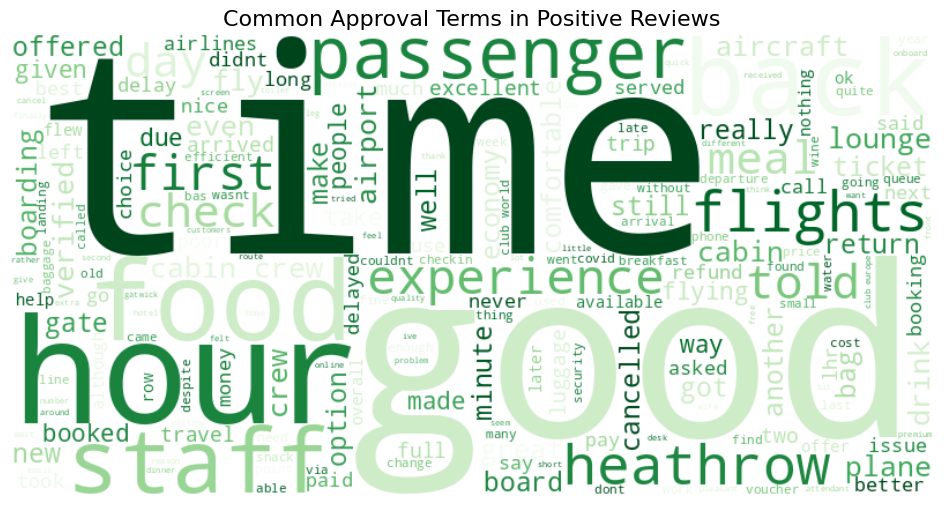

In [ ]:
# Create a string from the filtered words
filtered_text1 = ' '.join(filtered_words1)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(filtered_text1)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Approval Terms in Positive Reviews", fontsize=16)
plt.show()

<ipython-input-32-17cfc0b588eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=freq_df1, palette='Greens_r')


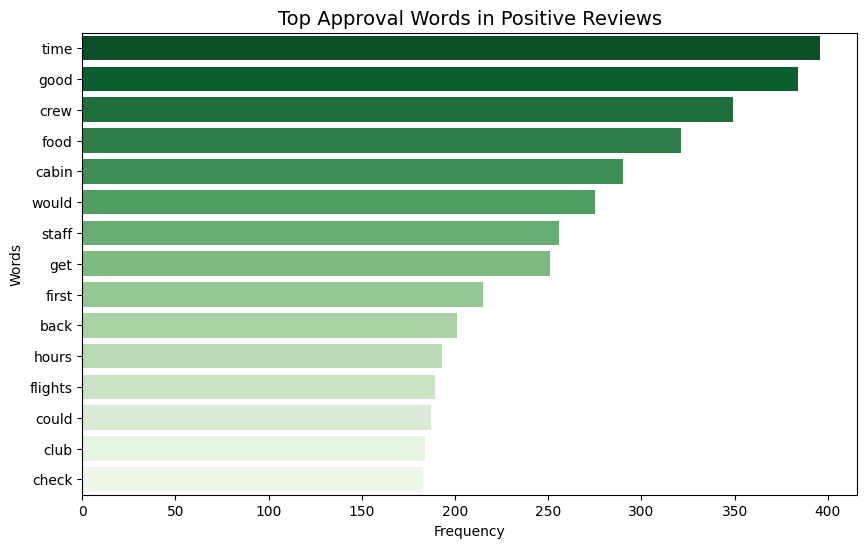

In [ ]:
# Convert the frequency dictionary into a DataFrame
freq_df1 = pd.DataFrame(freq1.most_common(15), columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=freq_df1, palette='Greens_r')
plt.title("Top Approval Words in Positive Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

Topic modelling on Positive Reviews

In [ ]:
# Vectorize text
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(positive_reviews['tokens'])

# LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display topics
for i, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i + 1}: {' '.join(words)}")

Topic 1: seats seat airways british economy service business flight ba class
Topic 2: told luggage hours airport london customer service airways british flight
Topic 3: seat club service cabin ba time food crew good flight
Topic 4: london fly cancelled return booked told flights staff ba flight
Topic 5: crew really dont going thank like food people plane flight


Drawing out insights from NEUTRAL REVIEWS

In [ ]:
neutral_reviews = df1[df1['sentiment'] == 'neutral']
stop_words = set(stopwords.words('english'))
words = ' '.join(neutral_reviews['tokens']).split()
filtered_words2 = [word for word in words if word not in stop_words]
freq2 = Counter(filtered_words2)
print(freq2.most_common(10))

[('flight', 13), ('seat', 7), ('ba', 6), ('one', 5), ('service', 5), ('passengers', 4), ('changed', 4), ('british', 4), ('airways', 4), ('hours', 4)]


Filtering out generic words

In [ ]:
# Standard stopwords
stop_words = set(stopwords.words('english'))

# setting stopwords for generic words to give insight
custom_stopwords = {
    'flight', 'ba', 'british', 'airways', 'class', 'seat', 'seats',
    'business', 'customer', 'service', 'airline', 'london', 'us', 'one'
}

# Combine both stopword lists
all_stopwords = stop_words.union(custom_stopwords)

# Create word list from 'tokens' column of negative reviews
neutral_reviews = df1[df1['sentiment'] == 'neutral']
words = ' '.join(neutral_reviews['tokens']).split()

# Filter out stopwords and custom stopwords
filtered_words2 = [word for word in words if word not in all_stopwords]

# Count word frequencies
freq2 = Counter(filtered_words2)

# Print most common words (real complaints)
print(freq2.most_common(20))

[('passengers', 4), ('changed', 4), ('hours', 4), ('premium', 4), ('economy', 4), ('luggage', 4), ('verified', 3), ('tickets', 3), ('day', 3), ('back', 3), ('non', 3), ('madrid', 3), ('refund', 3), ('never', 3), ('calls', 3), ('assignments', 3), ('got', 2), ('cancelled', 2), ('given', 2), ('titan', 2)]


Drawing out common words in neutral review



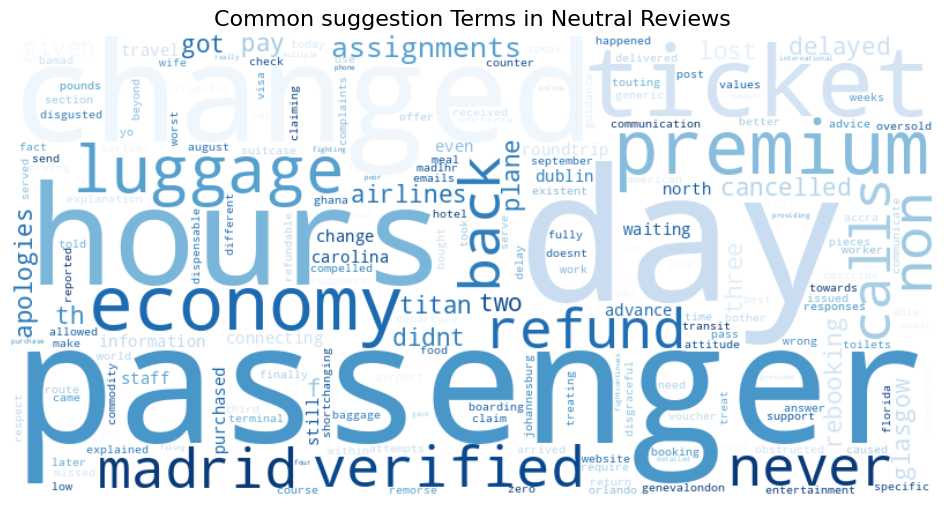

In [ ]:
# Create a string from the filtered words
filtered_text2 = ' '.join(filtered_words2)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(filtered_text2)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common suggestion Terms in Neutral Reviews", fontsize=16)
plt.show()

<ipython-input-39-82681a382235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=freq_df2, palette='Blues_r')


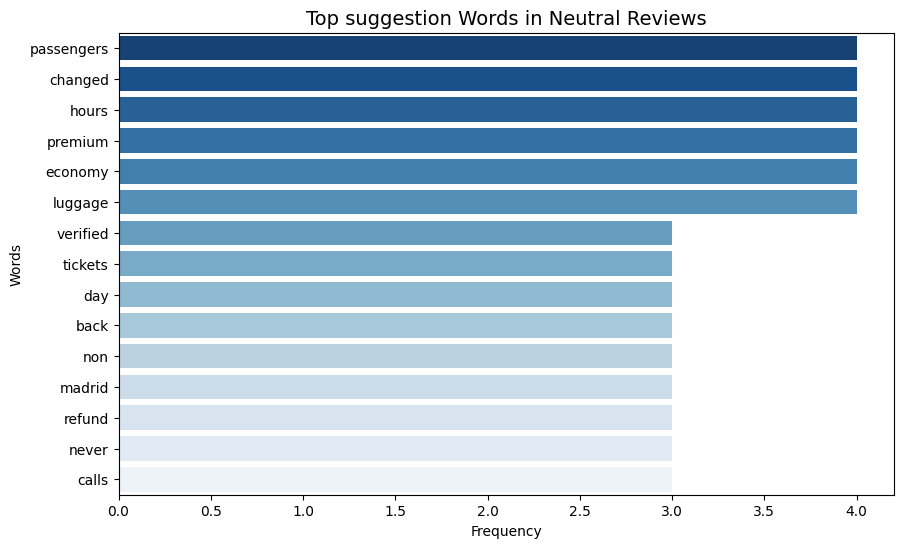

In [ ]:
# Convert the frequency dictionary into a DataFrame
freq_df2 = pd.DataFrame(freq2.most_common(15), columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=freq_df2, palette='Blues_r')
plt.title("Top suggestion Words in Neutral Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

# Create a new presentation
prs = Presentation()

# Define slide layouts
title_slide_layout = prs.slide_layouts[0]
content_slide_layout = prs.slide_layouts[5]

# Slide 1: Title Slide
slide = prs.slides.add_slide(title_slide_layout)
slide.shapes.title.text = "British Airways Review Analysis Report"
slide.placeholders[1].text = "Sentiment, Topic Modeling & Word Insights"

# Slide 2: Sentiment Distribution Overview
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Sentiment Distribution Overview"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include chart: Sentiment Distribution (Bar Chart)\n\nKey Stats:"
for line in [
    "- Positive: 612 (61.2%)",
    "- Negative: 377 (37.7%)",
    "- Neutral: 11 (1.1%)"
]:
    frame.add_paragraph().text = line

# Slide 3: Sentiment Summary
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Sentiment Summary"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include Sentiment Summary Table (counts + percentages)\n\nHighlights:"
points = [
    "- Majority of reviews are positive.",
    "- Notable share of negative feedback.",
    "- Neutral reviews are minimal but factual."
]
for point in points:
    frame.add_paragraph().text = point

# Slide 4: Top Words by Sentiment
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Top Words by Sentiment (Side-by-Side)"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include 3 bar charts or tables:"
entries = [
    "- Top appraisal words (Positive)",
    "- Top complaints words (Negative)",
    "- Top neutral words (Neutral)"
]
for entry in entries:
    frame.add_paragraph().text = entry

# Slide 5: Wordcloud – Positive Reviews
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Wordcloud – Positive Reviews"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include wordcloud image.\n\nNotes:"
frame.add_paragraph().text = "- Frequent words: crew, good, food, cabin"
frame.add_paragraph().text = "- Reflects strong satisfaction and service praise"

# Slide 6: Wordcloud – Negative Reviews
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Wordcloud – Negative Reviews"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include wordcloud image.\n\nNotes:"
frame.add_paragraph().text = "- Frequent terms: hours, luggage, cancelled, never"
frame.add_paragraph().text = "- Indicates frustration with delays, baggage, and communication"

# Slide 7: Wordcloud – Neutral Reviews
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Wordcloud – Neutral Reviews"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Include wordcloud image.\n\nNotes:"
frame.add_paragraph().text = "- Informative tone, with terms like “passengers,” “changed,” “economy”"
frame.add_paragraph().text = "- Neutral stance with helpful context"

# Slide 8: Topic Modeling (Negative Reviews)
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Topic Modeling (Negative Reviews)"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
topics = [
    "Topic 1: baggage, check, luggage, days, customer",
    "Topic 2: cabin, economy, seats, business, food",
    "Topic 3: gate, staff, time, boarding, delayed",
    "Topic 4: water, member, seat, voucher, ba",
    "Topic 5: cancelled, hours, airways, london, service"
]
frame.text = "Topics Identified:"
for topic in topics:
    frame.add_paragraph().text = topic

# Slide 9: Insights from Review Themes
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Insights from Review Themes"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
frame.text = "Sentiment Themes:"
frame.add_paragraph().text = "- Positive: Strong service, reliable crew"
frame.add_paragraph().text = "- Negative: Luggage issues, delay frustration"
frame.add_paragraph().text = "- Neutral: Objective statements, minimal emotion"

# Slide 10: Recommendations
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Recommendations"
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(9), Inches(5))
frame = textbox.text_frame
recs = [
    "• Improve baggage handling",
    "• Speed up delay recovery measures",
    "• Automate customer notifications",
    "• Track keywords for proactive support"
]
for rec in recs:
    frame.add_paragraph().text = rec

# Save file
pptx_path = "D:\myDSproject\Data\British_Airways_Review_Analysis_Report_Template.pptx"
prs.save(pptx_path)
pptx_path


'D:\\myDSproject\\Data\\British_Airways_Review_Analysis_Report_Template.pptx'